<a href="https://colab.research.google.com/github/eversonmariano/Analise-de-Dados_Machine-learning/blob/main/DepartamentoM%C3%A9dico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Departamento Médico

Estudo de caso: 

Detecção de uma doença baseado em imagens médicas através de técnicas de Deep Learning. Mais especificamente falando, fomos contratados por um hospital por um hospital para automatizar o processo de detectar e classificar doenças pulmonares, reduzindo o custo e tempo da detecção.



Os profissionais de saúde coletaram várias imagens de raio-x, 133 imagens que pertecem a 4 classes:

Healthy (saúdavel);

Covid-19;

Bacterial Pneumonia;

Viral Pneumonia.

Objetivo:

O objetivo deste projeto é detectar o Covid-19 a partir de raios-X e também diferenciar o Covid-19 da pneumonia viral e da pneumonia bacteriana. Criei um conjunto de dados personalizado que contém imagens de raios-x covid-19, imagens de raios-x de pneumonia viral, imagens de raios-x de pneumonia bacteriana e imagens de raios-x de pessoas normais. Cada classe contém 133 imagens.

In [2]:
import os
import cv2 #openCV
import tensorflow as tf #biblioteca da google p/ trabalhar com redes neurais
import numpy as np #recursos matemáticos
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Dense, AveragePooling2D, Dropout, Flatten #camadas da rede neural
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator #acessarmos um diretorios de imagem e enviarmos para uma rede neural
from tensorflow.keras.callbacks import ModelCheckpoint #salvar os pesos da rede neural
import matplotlib.pyplot as plt
import seaborn as sns #geração de gráficos

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
xray_directory = '/content/drive/MyDrive/Ciencias-de-Dados-para-Empresas/DepartamentoMedico/Dataset'

In [8]:
os.listdir(xray_directory)

['.DS_Store', '0', '1', '2', '3']

In [9]:
#Acessando as imagens
image_generator = ImageDataGenerator(rescale=1./255)

In [10]:
#Buscar as imagens de treinamento
train_generator = image_generator.flow_from_directory(batch_size= 40, directory=xray_directory,
                                                      shuffle = True, target_size=(256, 256), 
                                                      class_mode = 'categorical', subset='training')

Found 532 images belonging to 4 classes.


In [12]:
#criando variaveis para testar o treinamento

train_images, train_labels = next(train_generator)

In [13]:
#verificar as especificaçoes das primeiras 40 imagens 
train_images.shape

(40, 256, 256, 3)

In [14]:
#Mostrar as classes p/ cada uma das imagens
train_labels

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]],

In [15]:
#As classes serao representadas por 4 neuronios
#Covid1_19 - 1 0 0 0
#Normal    - 0 1 0 0
#Viral     - 0 0 1 0
#Bacterial - 0 0 0 1 
label_names = {0: 'Convid-19', 1: 'Normal', 2: 'Pneumonia viral', 3: 'Pneumonia bacterial'}

##Visualização dos dados

In [22]:
np.arange(0,36)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [23]:
np.argmax(train_labels[0])

1

In [24]:
label_names[1]

'Normal'

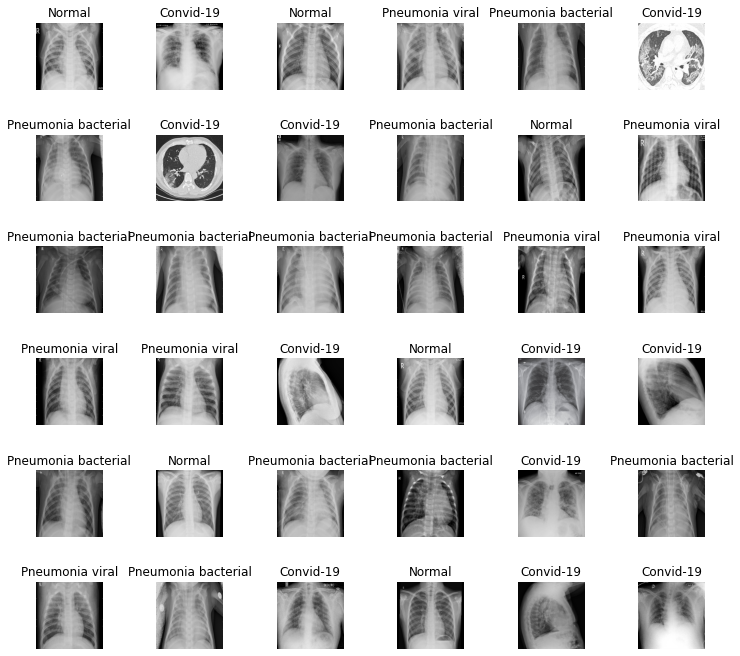

In [37]:
fig, axes = plt.subplots(6, 6, figsize=(12, 12))
axes = axes.ravel() #transforma matriz em vetor
for i in np.arange(0, 36):
  axes[i].imshow(train_images[i])
  axes[i].set_title(label_names[np.argmax(train_labels[i])])
  axes[i].axis('off')
plt.subplots_adjust(wspace=0.8)
